First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

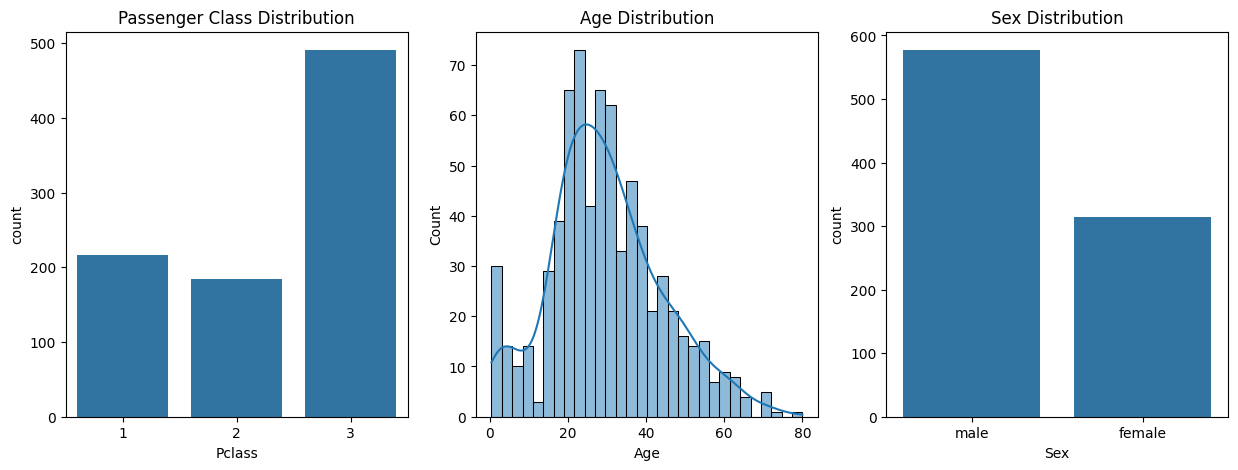

k-NN Performance:
Accuracy: 0.78
Precision: 0.77
Recall: 0.66
F1 Score: 0.71

Decision Tree Performance:
Accuracy: 0.76
Precision: 0.71
Recall: 0.69
F1 Score: 0.70



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Error predicting decision boundary: X has 2 features, but KNeighborsClassifier is expecting 8 features as input.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# Load the Titanic dataset
# Using a public URL from GitHub for demonstration
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(titanic_data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(titanic_data.isnull().sum())

# Visualize some key features
plt.figure(figsize=(15, 5))

# Distribution of Passenger Class
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')

# Distribution of Age
plt.subplot(1, 3, 2)
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

# Distribution of Sex
plt.subplot(1, 3, 3)
sns.countplot(x='Sex', data=titanic_data)
plt.title('Sex Distribution')

plt.show()

# Handling missing values
# Fill missing values in 'Age' with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
# Convert 'Sex' to numeric: 0 for male, 1 for female
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode the 'Embarked' column
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Standardize the 'Age' and 'Fare' columns
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Define the features and target variable
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = titanic_data['Survived']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the k-NN and Decision Tree models
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=42)

# Train the models
knn.fit(X_train, y_train)
dtree.fit(X_train, y_train)

# Make predictions using the trained models
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the k-NN model
evaluate_model(y_test, knn_pred, "k-NN")

# Evaluate the Decision Tree model
evaluate_model(y_test, dtree_pred, "Decision Tree")

# Visualize decision boundaries for 'Pclass' and 'Age' using a 2D plot
def plot_decision_boundary(model, X, y, title):
    # Ensure the dataset contains 'Pclass' and 'Age'
    if 'Pclass' not in X.columns or 'Age' not in X.columns:
        raise ValueError("'Pclass' or 'Age' is missing from the dataset.")

    # Use only 'Pclass' and 'Age' for visualization
    X_vis = X[['Pclass', 'Age']].values
    h = .02  # Step size for the mesh

    # Create color maps for the decision regions
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Create a mesh grid based on the two features
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict decision boundaries for each point in the mesh grid
    try:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    except Exception as e:
        raise ValueError(f"Error predicting decision boundary: {str(e)}")

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette=cmap_bold, edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Pclass')
    plt.ylabel('Age')
    plt.show()

# Plot decision boundaries for the k-NN model using 'Pclass' and 'Age'
plot_decision_boundary(knn, X_train, y_train, "k-NN Decision Boundary")

# Plot decision boundaries for the Decision Tree model using 'Pclass' and 'Age'
plot_decision_boundary(dtree, X_train, y_train, "Decision Tree Decision Boundary")

